In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.figsize'] = (9,6)
mpl.rcParams['axes.grid'] = True
from sympy import * 
# Shift+Enter zum Ausführen

In [2]:
x, Delta_x = symbols( 'x, Delta_x' )

In [3]:
f = Lambda(x, x**3)
print( f )

Lambda(x, x**3)


In [4]:
f_np = lambdify(x, f(x))

In [5]:
print(np.linspace( 0, 3 ))

[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


<IPython.core.display.Javascript object>


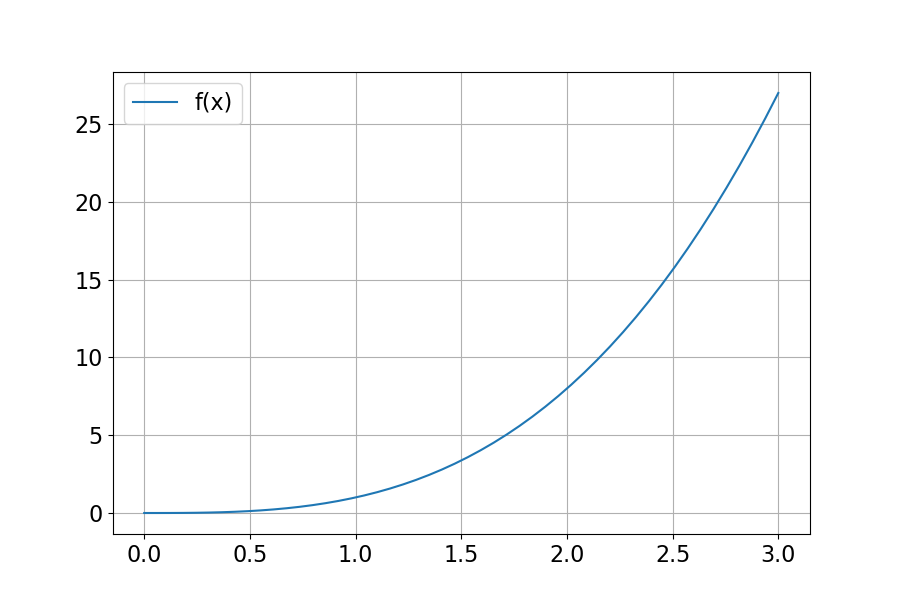

In [6]:
fig, ax = plt.subplots()
xx  = np.linspace( 0, 3 )
ax.plot(xx, f_np(xx), label="f(x)")
ax.legend()

In [7]:
fp = Lambda( x, f(x).diff(x, 1) ) # fp wgn fPrime --> f'
fp

Lambda(x, 3*x**2)

In [8]:
df = Lambda( (x, Delta_x), Delta_x*fp(x) )
df

Lambda((x, Delta_x), 3*Delta_x*x**2)

In [9]:
Delta_f = Lambda( (x, Delta_x),  f(x + Delta_x) - f(x) )
Delta_f

Lambda((x, Delta_x), -x**3 + (Delta_x + x)**3)

In [10]:
fp(1)

3

In [11]:
df(1,2)

6

In [12]:
Delta_f(1, 2)

26

In [13]:
df(1, 0.02)

0.0600000000000000

In [14]:
Delta_f(1, 0.02)

0.0612080000000002

In [15]:
# Rechtsseitiger Differenzenquotient
diff_R = Lambda( (x, Delta_x), ( f(x+Delta_x) - f(x) )/Delta_x )
diff_R

Lambda((x, Delta_x), (-x**3 + (Delta_x + x)**3)/Delta_x)

In [16]:
# Linksseitiger Differenzenquotient
diff_L = Lambda( (x, Delta_x), ( f(x) - f(x-Delta_x) )/Delta_x )
diff_L

Lambda((x, Delta_x), (x**3 - (-Delta_x + x)**3)/Delta_x)

In [17]:
# Zentraler Differenzenquotient
diff_Z = Lambda( (x, Delta_x), ( f(x+Delta_x) - f(x-Delta_x) )/Delta_x )
diff_Z

Lambda((x, Delta_x), (-(-Delta_x + x)**3 + (Delta_x + x)**3)/Delta_x)

In [18]:
print( fp(1) )

3


In [19]:
print( diff_R(1, 2) )
print( diff_R(1, 0.02) )

13
3.06040000000001


In [20]:
print( diff_L(1, 2) )
print( diff_L(1, 0.02) )

1
2.94040000000000


In [21]:
print( diff_Z(1, 2) )
print( diff_Z(1, 0.02) )

14
6.00080000000001
